In [23]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets

In [24]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In this note we would like to explain two concepts.
* Logistic Regression is

## Dataset

In [29]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [26]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

So if target is 0 the cancer is __malignant__. Otherwise, if the target is 1, the canser is __benign__.

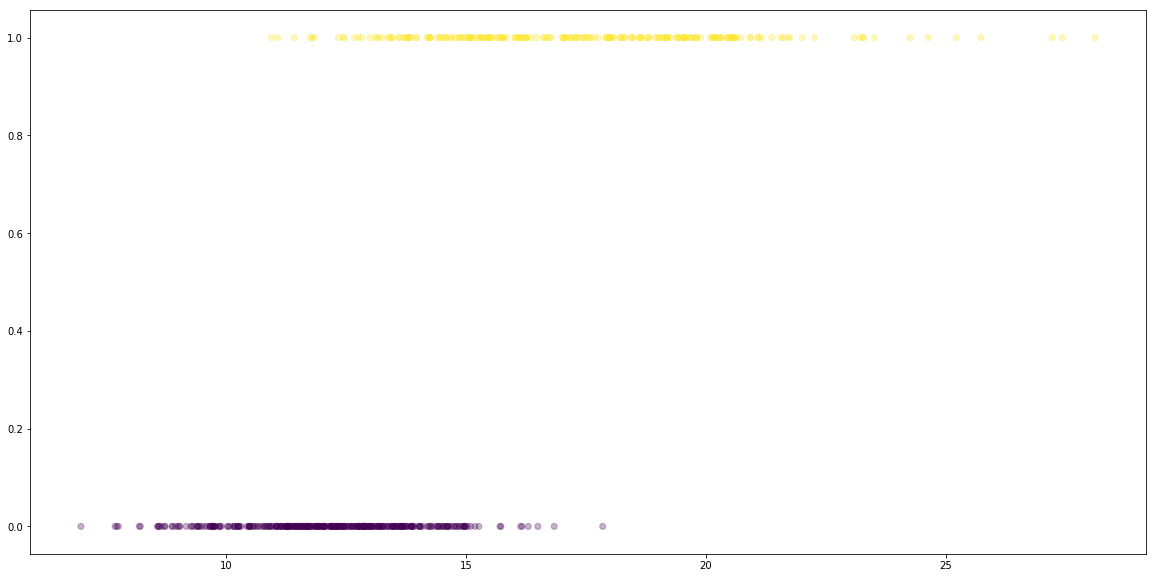

In [35]:
y = data.target == 0 # if zero then we dedect malignant cancer.

plt.scatter(data.data[:, [0]], y, alpha=0.3, c=y)

In [78]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# 4. Fit model to train data.
reg.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import mean_squared_error, r2_score
y_test_hat = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat)), r2_score(y_test, y_test_hat)

(0.3180844231652842, 0.5651767881666505)

But we want to predict if it is dedect malignant cancer or not. Let's look at $\hat{y}$.

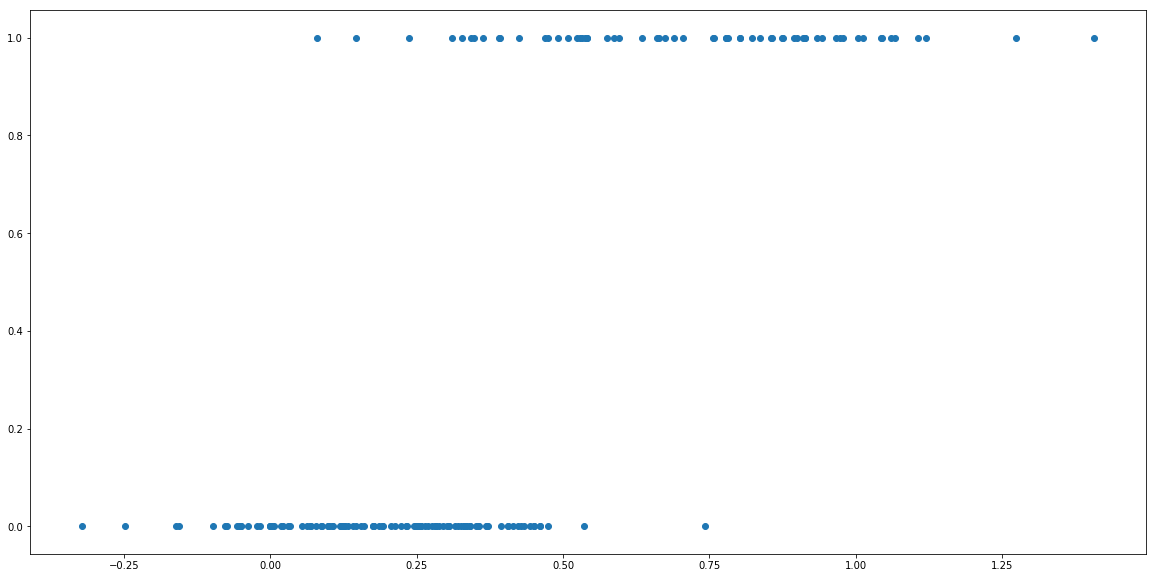

In [79]:
plt.scatter(y_test_hat, y_test )

## Accuracy

In [80]:
y_test_hat = y_test_hat >= 0.5

In [81]:
n_sample = len(y_test)
correct_prediction = sum(y_test == y_test_hat)

# Accuracy
correct_prediction/n_sample

0.9064327485380117

90%! not bad

## Confusion matrix

In [82]:
true_positive = sum(y_test & y_test_hat)
false_positive = sum(~y_test & y_test_hat)
true_negative = sum(~y_test & ~y_test_hat)
false_negative = sum(y_test & ~y_test_hat)

pd.DataFrame({
        "Predicted 0": [true_negative, false_positive], 
        "Predicted 1": [false_negative, true_positive]
    },
    index= ["Actual 0", "Actual 1"]
)


,Predicted 0,Predicted 1
Actual 0,106,14
Actual 1,2,49


In [83]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# 4. Fit model to train data.
reg.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import accuracy_score
y_test_hat = reg.predict(X_test)
accuracy_score(y_test, y_test_hat)

0.9122807017543859